In [1]:
import pickle
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [3]:
MSE = lambda actual, predict: np.mean((actual - predict)**2)

In [4]:
with open('appml-assignment1-dataset.pkl', 'rb') as f:
    data = pickle.load(f)

In [5]:
X = data['X'].copy()
y = data['y'].copy()
X = X.drop(['date'], axis=1).to_numpy()
y = y.to_numpy()

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

X[np.where(np.isnan(X))] = 0

X = np.append(np.ones([len(X), 1]), X, 1)

lin_regr = LinearRegression().fit(X, y)

with open('model1.pkl', 'wb') as f:
    pickle.dump(lin_regr, f)

In [6]:
from code1 import Model_1_Transformer

In [7]:
p = Model_1_Transformer()

with open('pipeline1.pkl', 'wb') as f:
    pickle.dump(p, f)

1.7092888948040003e-06


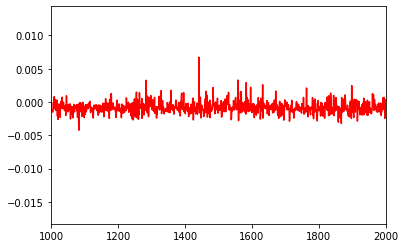

In [9]:
x_train, x_test, y_train, y_test = train_test_split(data['X'], data['y'], test_size=0.2, random_state=0)
with open('model1.pkl', 'rb') as f_model, open('pipeline1.pkl', 'rb') as f_pipe:
    model = pickle.load(f_model)
    pipe = pickle.load(f_pipe)
    x_test_pipe = pipe.transform(x_test)
    y_predict_pipe = model.predict(x_test_pipe)

    print(MSE(y_test, y_predict_pipe))

    plt.plot(range(len(y_test)), y_test-y_predict_pipe, 'r')
    plt.xlim([1000, 2000])